In [1]:
!pip install pandas
!pip install numpy

In [43]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
ativos = ['ABEV3.SA', 'ITSA4.SA', 'PETR4.SA', 'VALE3.SA']

In [4]:
carteira_passado = yf.download(ativos, start='2016-01-01', end='2018-12-31')['Close']
carteira_presente = yf.download(ativos, start='2019-01-01', end='2020-12-31')['Close']

/tmp/ipython-input-4-3456456486.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  carteira_passado = yf.download(ativos, start='2016-01-01', end='2018-12-31')['Close']
[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-4-3456456486.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  carteira_presente = yf.download(ativos, start='2019-01-01', end='2020-12-31')['Close']
[*********************100%***********************]  4 of 4 completed


In [5]:
carteira_passado.head()

Ticker,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,11.946368,3.024796,1.978745,8.886400
2016-01-05,12.133792,3.075208,1.924019,8.767355
2016-01-06,12.015787,3.102706,1.843372,8.123110
2016-01-07,11.696476,3.056877,1.803048,7.639925
2016-01-08,11.849188,3.056877,1.805928,7.380824


In [6]:
carteira_presente.head()

Ticker,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-02,12.336809,7.764503,7.229302,39.107304
2019-01-03,12.474308,7.832021,7.406580,37.507492
2019-01-04,12.642365,7.807469,7.427613,39.949303
2019-01-07,12.588893,7.801333,7.544797,39.734978
2019-01-08,12.336809,7.905676,7.499726,40.117706


In [7]:
pesos_passado = np.array([carteira_passado['ABEV3.SA'].iloc[-1]/np.sum(carteira_passado.iloc[-1]),carteira_passado['ITSA4.SA'].iloc[-1]/np.sum(carteira_passado.iloc[-1]),carteira_passado['PETR4.SA'].iloc[-1]/np.sum(carteira_passado.iloc[-1]),carteira_passado['VALE3.SA'].iloc[-1]/np.sum(carteira_passado.iloc[-1])])

In [8]:
pesos_presente = np.array([carteira_presente['ABEV3.SA'].iloc[-1]/np.sum(carteira_presente.iloc[-1]),carteira_presente['ITSA4.SA'].iloc[-1]/np.sum(carteira_presente.iloc[-1]),carteira_presente['PETR4.SA'].iloc[-1]/np.sum(carteira_presente.iloc[-1]),carteira_presente['VALE3.SA'].iloc[-1]/np.sum(carteira_presente.iloc[-1])])

In [9]:
ret_anualizado_pres=round(((carteira_presente.iloc[-1]/carteira_presente.iloc[0])**(12/48)-1),2)

In [10]:
ret_anualizado_pres

,0
Ticker,
ABEV3.SA,0.01
ITSA4.SA,-0.00
PETR4.SA,0.05
VALE3.SA,0.16


In [11]:
print("Retorno Anualizado Carteira (%): ",ret_anualizado_pres.dot(pesos_presente))

Retorno Anualizado Carteira (%):  0.11937444233843797


In [12]:
matriz_retornos=carteira_presente.pct_change()

In [13]:
matriz_retornos.dropna(inplace=True)

In [14]:
matriz_retornos.head()

Ticker,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-03,0.011145,0.008696,0.024522,-0.040908
2019-01-04,0.013472,-0.003135,0.002840,0.065102
2019-01-07,-0.004230,-0.000786,0.015777,-0.005365
2019-01-08,-0.020024,0.013375,-0.005974,0.009632
2019-01-09,0.014241,0.013199,0.020833,0.024423


In [97]:
matriz_cov=matriz_retornos.cov()

In [16]:
vol_diaria=np.sqrt((pesos_presente.T).dot(matriz_cov).dot(pesos_presente))

In [17]:
print('Volatilidade Diária: ', round(vol_diaria*100,2),'%')

Volatilidade Diária:  2.56 %


In [18]:
print('Volatilidade Anual: ', round(vol_diaria*np.sqrt(252)*100,2),'%')

Volatilidade Anual:  40.59 %


In [19]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.3 MB/s eta 0:00:00


In [20]:
from pypfopt import expected_returns

In [21]:
ret_anualizado_pass=expected_returns.mean_historical_return(carteira_presente)

In [22]:
ret_anualizado_pass

,0
Ticker,
ABEV3.SA,0.010529
ITSA4.SA,-0.003543
PETR4.SA,0.105166
VALE3.SA,0.360413


In [23]:
erro_medio_abs_retm=np.sum(np.abs(ret_anualizado_pass-ret_anualizado_pres))/len(ret_anualizado_pass)
erro_medio_abs_retm

np.float64(0.06491273142911723)

In [24]:
mm_exp=expected_returns.ema_historical_return(carteira_passado, span=200)

In [25]:
mm_exp

,2018-12-28
Ticker,
ABEV3.SA,-0.287982
ITSA4.SA,0.429828
PETR4.SA,0.495335
VALE3.SA,0.155658


In [26]:
erro_medio_abs_mme=np.sum(np.abs(mm_exp-ret_anualizado_pres))/len(mm_exp)
erro_medio_abs_mme

np.float64(0.2943718064510228)

In [27]:
selic_diaria=(1.15**(1/252)-1) #Considerando Selic atual

In [28]:
ibovespa=yf.download('^BVSP', start='2016-01-01', end='2018-12-31')['Close']

/tmp/ipython-input-28-4082034788.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibovespa=yf.download('^BVSP', start='2016-01-01', end='2018-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


In [29]:
capm=expected_returns.capm_return(carteira_passado, market_prices=ibovespa, risk_free_rate=selic_diaria)

/usr/local/lib/python3.11/dist-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [30]:
erro_medio_abs_capm=np.sum(np.abs(capm-ret_anualizado_pres))/len(capm)
erro_medio_abs_capm

np.float64(0.27247657144880943)

In [31]:
from pypfopt import risk_models

In [32]:
sample_cov=risk_models.sample_cov(carteira_passado)

In [33]:
erro_medio_abs_cov=np.sum(np.abs(np.diag(sample_cov)-np.diag(matriz_cov)))/len(matriz_cov)
erro_medio_abs_cov

np.float64(0.15834912407742155)

In [34]:
semicov=risk_models.semicovariance(carteira_passado, benchmark=0)
semicov

Ticker,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Ticker,,,,
ABEV3.SA,0.019784,0.015541,0.024468,0.019488
ITSA4.SA,0.015541,0.040602,0.044784,0.027169
PETR4.SA,0.024468,0.044784,0.122588,0.056059
VALE3.SA,0.019488,0.027169,0.056059,0.103839


In [35]:
erro_medio_abs_semicov=np.sum(np.abs(np.diag(semicov)-np.diag(matriz_cov)))/len(np.diag(semicov))
erro_medio_abs_semicov

np.float64(0.07093470372400143)

In [36]:
exp_cov=risk_models.exp_cov(carteira_passado, span=400)
exp_cov

Ticker,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Ticker,,,,
ABEV3.SA,0.046359,0.027887,0.031752,0.020778
ITSA4.SA,0.027887,0.092446,0.083484,0.024347
PETR4.SA,0.031752,0.083484,0.241827,0.045649
VALE3.SA,0.020778,0.024347,0.045649,0.130017


In [37]:
erro_medio_abs_exp_cov=np.sum(np.abs(np.diag(exp_cov)-np.diag(matriz_cov)))/len(np.diag(exp_cov))
erro_medio_abs_exp_cov

np.float64(0.12689377689220904)

In [38]:
from pypfopt import EfficientFrontier

In [39]:
minimal_variance=EfficientFrontier(capm, semicov)

In [40]:
minimal_variance.min_volatility()

OrderedDict([('ABEV3.SA', 0.8552305086438433),
             ('ITSA4.SA', 0.1447694913561566),
             ('PETR4.SA', 0.0),
             ('VALE3.SA', 0.0)])

In [41]:
pesos_vol=minimal_variance.clean_weights()

<Axes: >

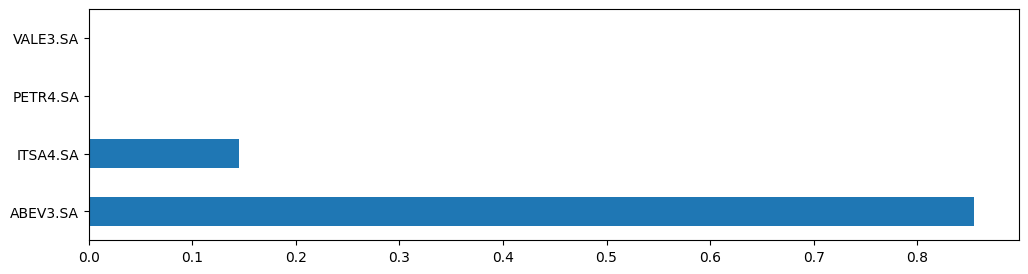

In [44]:
plt.figure(figsize=(12,3))
pd.Series(pesos_vol).plot(kind='barh')

In [45]:
# Comparando Volatilidade
pesos_vol=pesos_vol.values()
pesos_vol=list(pesos_vol)
pesos_vol=np.array(pesos_vol)
vol_otimizada=np.sqrt(((pesos_vol.T).dot(matriz_cov)).dot(pesos_vol))
print("Volatilidade Anual Otimizada:",round(vol_otimizada*np.sqrt(252),3)*100,"%", "vs Volatilidade Anual sem Otimização:", round(vol_diaria*np.sqrt(252),3)*100,"%")

Volatilidade Anual Otimizada: 35.4 % vs Volatilidade Anual sem Otimização: 40.6 %


In [46]:
# Comparando Retorno
retorno_otimizado=ret_anualizado_pres.dot(pesos_vol)
print("Retorno Anual Mínima Variância:",round(retorno_otimizado,5)*100,"%", "vs Retorno Anual sem Minimização:", round(ret_anualizado_pres.dot(pesos_presente),5)*100,"%")

Retorno Anual Mínima Variância: 0.855 % vs Retorno Anual sem Minimização: 11.937000000000001 %


In [47]:
risco_eficiente=EfficientFrontier(capm, semicov)
risco_eficiente.efficient_risk(target_volatility=0.15)
ef_risk_pesos=risco_eficiente.clean_weights(rounding=2)
ef_risk_pesos

OrderedDict([('ABEV3.SA', 0.52),
             ('ITSA4.SA', 0.4),
             ('PETR4.SA', 0.02),
             ('VALE3.SA', 0.06)])

In [48]:
risco_eficiente.portfolio_performance(verbose=True, risk_free_rate=((selic_diaria+1)**252-1))

Expected annual return: 22.7%
Annual volatility: 15.0%
Sharpe Ratio: 0.51


(np.float64(0.2270515022751179),
 np.float64(0.15000000052240678),
 np.float64(0.5136766800453392))

In [49]:
ef_risk_pesos=ef_risk_pesos.values()
ef_risk_pesos=list(ef_risk_pesos)
ef_risk_pesos=np.array(ef_risk_pesos)
ef_risk_pesos

array([0.52, 0.4 , 0.02, 0.06])

In [50]:
#Os pesos que, na amostra de treino fixaram a volatilidade anual em 15%, geraram uma volatilidade ligeiramente maior fora da amostra
vol_ef_risk_otim=np.sqrt(np.dot(ef_risk_pesos.T,np.dot(matriz_cov,ef_risk_pesos)))
print("Volatilidade Anual Otimizada Fora da Amostra (Risco Eficiente): ", round(vol_ef_risk_otim*np.sqrt(252),7)*100, "%")

Volatilidade Anual Otimizada Fora da Amostra (Risco Eficiente):  31.9981 %


In [51]:
#Os pesos que, na amostra de treino geraram um retorno anual em 22.8%, resultaram em um retorno significativamente menor fora da amostra
ret_ef_risk_otim=(ret_anualizado_pres).dot(ef_risk_pesos)
print("Retorno Anualizado Otimizado Fora da Amostra (Risco Eficiente): ", round(ret_ef_risk_otim,7)*100, "%")

Retorno Anualizado Otimizado Fora da Amostra (Risco Eficiente):  1.58 %


In [52]:
vol_limite=np.arange(0.15,0.30,0.01)
vols_treino=[]
vols_teste=[]
for i in vol_limite:
  vols_treino.append(i)
  risco_eficiente=EfficientFrontier(capm, semicov)
  risco_eficiente.efficient_risk(target_volatility=i)
  ef_risk_pesos=risco_eficiente.clean_weights(rounding=2)
  ef_risk_pesos=ef_risk_pesos.values()
  ef_risk_pesos=ef_risk_pesos=list(ef_risk_pesos)
  ef_risk_pesos=np.array(ef_risk_pesos)
  vol_teste=np.dot(ef_risk_pesos.T,np.dot(matriz_cov,ef_risk_pesos))*np.sqrt(252)*100
  vols_teste.append(vol_teste)

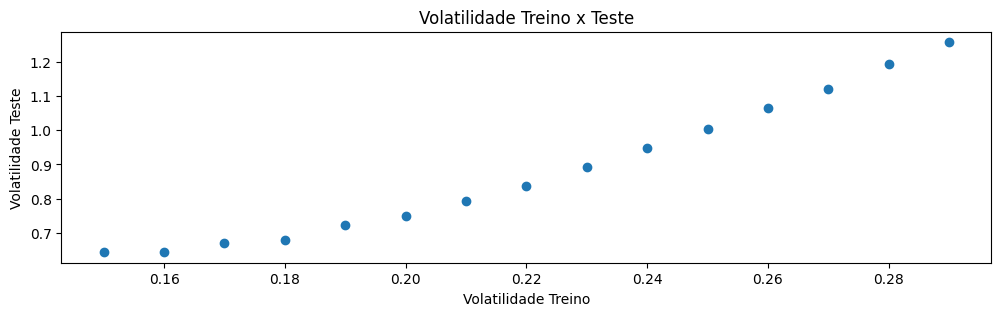

In [54]:
plt.figure(figsize=(12,3))
plt.scatter(vols_treino, vols_teste);
plt.title('Volatilidade Treino x Teste');
plt.xlabel('Volatilidade Treino');
plt.ylabel('Volatilidade Teste');

<Axes: >

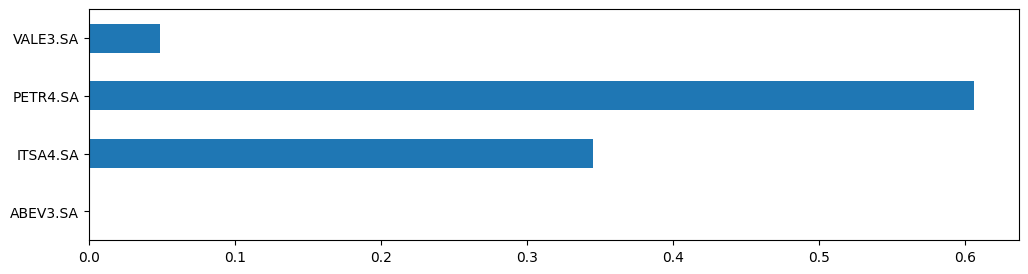

In [78]:
maxsharpe=EfficientFrontier(capm, semicov)
maxsharpe.max_sharpe(risk_free_rate=((1+selic_diaria)**252-1))
maxsharpe_pesos=maxsharpe.clean_weights()
plt.figure(figsize=(12,3))
pd.Series(maxsharpe_pesos).plot.barh()

In [79]:
maxsharpe_pesos=maxsharpe_pesos.values()
maxsharpe_pesos=list(maxsharpe_pesos)
maxsharpe_pesos=np.array(maxsharpe_pesos)

In [80]:
vol_sharpe=(np.sqrt(((maxsharpe_pesos.T).dot(matriz_cov)).dot(maxsharpe_pesos)))*np.sqrt(252)
print("Volatilidade Anualizada Fora da Amostra (Máximo Sharpe): ", round(vol_sharpe,7)*100, "%")

Volatilidade Anualizada Fora da Amostra (Máximo Sharpe):  42.3033 %


In [81]:
retorno_sharpe=ret_anualizado_pres.dot(maxsharpe_pesos)
print("Retorno Anualizado Fora da Amostra (Máximo Sharpe): ", round(retorno_sharpe,7)*100, "%")

Retorno Anualizado Fora da Amostra (Máximo Sharpe):  3.80826 %


In [59]:
ativos_carteira=['ABEV3.SA', 'MGLU3.SA', 'BBDC4.SA', 'PETR4.SA', 'VALE3.SA', 'GGBR4.SA', 'LREN3.SA', 'PRIO3.SA', 'ITUB4.SA', 'BBSE3.SA', 'BBSA3.SA']
carteira_ativos = yf.download(ativos_carteira, start='2023-01-01', end='2023-12-31')['Close']
carteira_ativos.dropna(axis=True, inplace=True)
carteira_ativos.head()

/tmp/ipython-input-59-2445253772.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  carteira_ativos = yf.download(ativos_carteira, start='2023-01-01', end='2023-12-31')['Close']
[*****************     36%                       ]  4 of 11 completedERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  11 of 11 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBSA3.SA']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,ABEV3.SA,BBDC4.SA,BBSE3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Date,,,,,,,,,,
2023-01-02,12.548674,14.75,33.389999,21.768559,22.025509,17.077314,24.224874,14.022720,36.759998,89.400002
2023-01-03,12.530987,14.00,32.349998,21.812897,21.566828,16.670923,23.757212,13.667871,34.299999,89.239998
2023-01-04,12.601733,14.04,32.509998,21.709442,21.629787,16.776939,23.850744,14.102258,34.090000,89.400002
2023-01-05,12.637107,14.65,32.580002,22.241468,22.304312,16.520735,24.879601,14.610062,34.970001,90.900002
2023-01-06,12.663636,15.06,33.529999,22.411419,22.691040,17.130322,25.814924,14.524407,35.180000,92.339996


In [60]:
retornos_carteira_ativos=carteira_ativos.iloc[-1] / carteira_ativos.iloc[0]
retornos_anuais_carteira_ativos = (1+retornos_carteira_ativos)**(252/len(carteira_ativos))-1
retornos_anuais_carteira_ativos

,0
Ticker,
ABEV3.SA,1.041145
BBDC4.SA,1.185602
BBSE3.SA,1.030487
GGBR4.SA,0.883746
ITUB4.SA,1.420832
LREN3.SA,0.920994
MGLU3.SA,0.852005
PETR4.SA,2.161010
PRIO3.SA,1.282423


In [61]:
ibovespa_benchmark=yf.download('^BVSP', start='2023-01-01', end='2023-12-31')['Close']
ibovespa_benchmark.dropna(axis=True, inplace=True)
ibovespa_benchmark.head()

/tmp/ipython-input-61-1295665818.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibovespa_benchmark=yf.download('^BVSP', start='2023-01-01', end='2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^BVSP
Date,
2023-01-02,106376.0
2023-01-03,104166.0
2023-01-04,105334.0
2023-01-05,107518.0
2023-01-06,108836.0


In [62]:
capm_carteira_ativos=expected_returns.capm_return(carteira_ativos, market_prices=ibovespa_benchmark, risk_free_rate=selic_diaria)
capm_carteira_ativos

,mkt
ABEV3.SA,0.169054
BBDC4.SA,0.313011
BBSE3.SA,0.098886
GGBR4.SA,0.251296
ITUB4.SA,0.272488
LREN3.SA,0.490820
MGLU3.SA,0.546927
PETR4.SA,0.259871
PRIO3.SA,0.242312
VALE3.SA,0.237665


In [63]:
#Estimando Matriz de Covariância
matriz_cov_carteira=risk_models.semicovariance(carteira_ativos, benchmark=0)
matriz_cov_carteira

Ticker,ABEV3.SA,BBDC4.SA,BBSE3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Ticker,,,,,,,,,,
ABEV3.SA,0.020013,0.013795,0.007492,0.010904,0.010240,0.020433,0.027706,0.010279,0.010037,0.009568
BBDC4.SA,0.013795,0.042250,0.012163,0.018049,0.021685,0.031504,0.040332,0.017437,0.019394,0.014975
BBSE3.SA,0.007492,0.012163,0.029257,0.012543,0.010093,0.018498,0.023915,0.009881,0.013845,0.006707
GGBR4.SA,0.010904,0.018049,0.012543,0.045881,0.014639,0.027876,0.037612,0.015167,0.020484,0.025071
ITUB4.SA,0.010240,0.021685,0.010093,0.014639,0.020950,0.027980,0.030513,0.013523,0.015216,0.012050
LREN3.SA,0.020433,0.031504,0.018498,0.027876,0.027980,0.104044,0.086172,0.025460,0.031257,0.027672
MGLU3.SA,0.027706,0.040332,0.023915,0.037612,0.030513,0.086172,0.249294,0.031383,0.046736,0.037290
PETR4.SA,0.010279,0.017437,0.009881,0.015167,0.013523,0.025460,0.031383,0.040177,0.027410,0.016439
PRIO3.SA,0.010037,0.019394,0.013845,0.020484,0.015216,0.031257,0.046736,0.027410,0.061342,0.019127


Text(0.5, 1.0, 'Pesos da Carteira Long/Short com Mínima Variância')

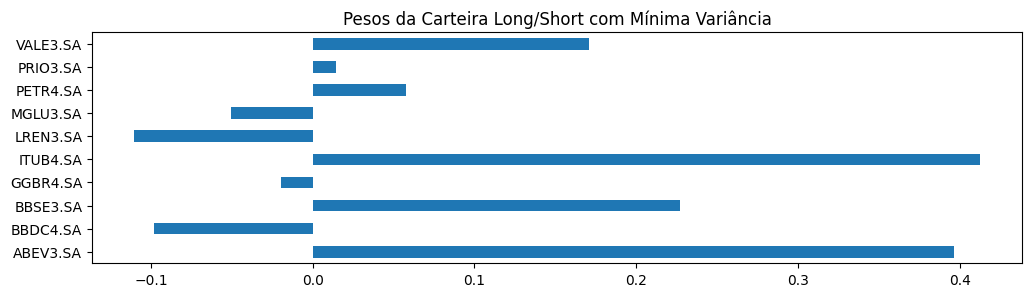

In [64]:
#Mínima Variância com Operações Compradas e Vendidas
min_var=EfficientFrontier(capm_carteira_ativos, matriz_cov_carteira, weight_bounds=(None,None))
min_var.min_volatility()
min_var_long_short_pesos=min_var.clean_weights()
plt.figure(figsize=(12,3))
pd.Series(min_var_long_short_pesos).plot.barh()
plt.title('Pesos da Carteira Long/Short com Mínima Variância')

In [98]:
min_var.portfolio_performance(verbose=True, risk_free_rate=((selic_diaria+1)**252-1))

Expected annual return: 14.3%
Annual volatility: 10.5%
Sharpe Ratio: -0.06


(np.float64(0.14338899579962),
 np.float64(0.10488382415688986),
 np.float64(-0.06303168532890059))

In [66]:
min_var_long_short_pesos=min_var_long_short_pesos.values()
min_var_long_short_pesos=list(min_var_long_short_pesos)
min_var_long_short_pesos=np.array(min_var_long_short_pesos)

In [67]:
carteira_ativos_futuro=yf.download(ativos_carteira, start='2024-01-01', end='2024-12-31')['Close']
carteira_ativos_futuro.dropna(axis=True, inplace=True)
carteira_ativos_futuro.head()

/tmp/ipython-input-67-3317967400.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  carteira_ativos_futuro=yf.download(ativos_carteira, start='2024-01-01', end='2024-12-31')['Close']
[*****************     36%                       ]  4 of 11 completedERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  11 of 11 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBSA3.SA']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,ABEV3.SA,BBDC4.SA,BBSE3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Date,,,,,,,,,,
2024-01-02,12.757923,16.750000,33.889999,18.645508,30.146795,15.204376,19.174128,29.928623,45.349998,77.050003
2024-01-03,12.655562,16.750000,33.740002,18.439484,29.814028,14.921668,18.706467,30.863398,46.880001,76.650002
2024-01-04,12.702089,16.520000,33.980000,18.344391,29.616171,14.338584,18.051741,30.601976,46.419998,75.620003
2024-01-05,12.655562,16.879999,33.680000,18.352316,30.308680,14.700803,18.425869,30.673277,46.080002,74.650002
2024-01-08,12.757923,16.750000,33.520000,18.510798,29.984909,15.266218,19.548258,30.443542,45.750000,74.269997


In [68]:
retornos_carteira_ativos_futuro=carteira_ativos_futuro.iloc[-1] / carteira_ativos_futuro.iloc[0]
retornos_anuais_carteira_ativos_futuro = (1+retornos_carteira_ativos_futuro)**(252/len(carteira_ativos_futuro))-1
retornos_anuais_carteira_ativos_futuro

,0
Ticker,
ABEV3.SA,0.908394
BBDC4.SA,0.693687
BBSE3.SA,1.073564
GGBR4.SA,0.964517
ITUB4.SA,0.921741
LREN3.SA,0.789444
MGLU3.SA,0.340557
PETR4.SA,1.180573
PRIO3.SA,0.890105


In [99]:
matriz_cov_carteira_ativos_futuro=carteira_ativos_futuro.pct_change().cov()
matriz_cov_carteira_ativos_futuro.dropna(inplace=True)
matriz_cov_carteira_ativos_futuro.head()

Ticker,ABEV3.SA,BBDC4.SA,BBSE3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Ticker,,,,,,,,,,
ABEV3.SA,0.000164,0.000064,0.000035,0.000034,0.000050,0.000095,0.000127,-0.000003,0.000028,0.000029
BBDC4.SA,0.000064,0.000301,0.000024,0.000046,0.000105,0.000180,0.000179,0.000006,0.000030,0.000012
BBSE3.SA,0.000035,0.000024,0.000108,0.000025,0.000031,0.000071,0.000088,0.000010,0.000034,0.000012
GGBR4.SA,0.000034,0.000046,0.000025,0.000310,0.000036,0.000126,0.000132,0.000025,0.000068,0.000101
ITUB4.SA,0.000050,0.000105,0.000031,0.000036,0.000141,0.000138,0.000158,0.000012,0.000038,0.000018


In [85]:
retorno_anual_long_short=retornos_anuais_carteira_ativos_futuro.dot(min_var_long_short_pesos)
print("Retorno Anualizado Fora da Amostra (Mínima Variância Long/Short): ", round(retorno_anual_long_short,7)*100, "%")

Retorno Anualizado Fora da Amostra (Mínima Variância Long/Short):  99.49833 %


In [95]:
volatilidade_anual_long_short=((min_var_long_short_pesos.T).dot(matriz_cov_carteira_ativos_futuro)).dot(min_var_long_short_pesos)*np.sqrt(252)
print("Volatilidade Anualizada Fora da Amostra (Mínima Variância Long/Short): ", round(volatilidade_anual_long_short,7)*100, "%")

Volatilidade Anualizada Fora da Amostra (Mínima Variância Long/Short):  0.11104000000000001 %


In [71]:
semicov_carteira=risk_models.semicovariance(carteira_ativos, benchmark=0)
semicov_carteira

Ticker,ABEV3.SA,BBDC4.SA,BBSE3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Ticker,,,,,,,,,,
ABEV3.SA,0.020013,0.013795,0.007492,0.010904,0.010240,0.020433,0.027706,0.010279,0.010037,0.009568
BBDC4.SA,0.013795,0.042250,0.012163,0.018049,0.021685,0.031504,0.040332,0.017437,0.019394,0.014975
BBSE3.SA,0.007492,0.012163,0.029257,0.012543,0.010093,0.018498,0.023915,0.009881,0.013845,0.006707
GGBR4.SA,0.010904,0.018049,0.012543,0.045881,0.014639,0.027876,0.037612,0.015167,0.020484,0.025071
ITUB4.SA,0.010240,0.021685,0.010093,0.014639,0.020950,0.027980,0.030513,0.013523,0.015216,0.012050
LREN3.SA,0.020433,0.031504,0.018498,0.027876,0.027980,0.104044,0.086172,0.025460,0.031257,0.027672
MGLU3.SA,0.027706,0.040332,0.023915,0.037612,0.030513,0.086172,0.249294,0.031383,0.046736,0.037290
PETR4.SA,0.010279,0.017437,0.009881,0.015167,0.013523,0.025460,0.031383,0.040177,0.027410,0.016439
PRIO3.SA,0.010037,0.019394,0.013845,0.020484,0.015216,0.031257,0.046736,0.027410,0.061342,0.019127


In [72]:
from pypfopt import EfficientSemivariance

/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:172: RuntimeWarning: Market neutrality requires shorting - bounds have been amended
  warnings.warn(


<Axes: >

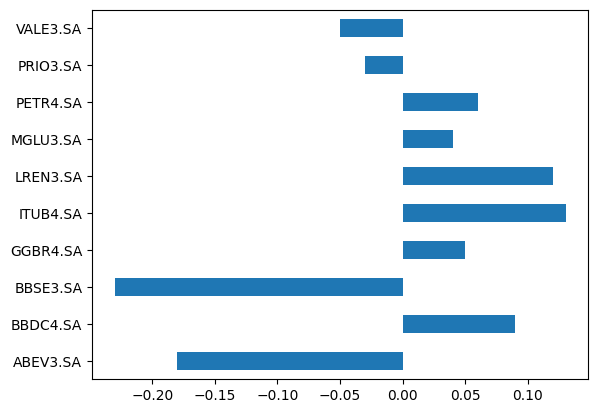

In [73]:
retorno_eficiente=EfficientFrontier(capm_carteira_ativos, matriz_cov_carteira)
retorno_eficiente.efficient_return(target_return=0.10, market_neutral=True)
ef_return_pesos=retorno_eficiente.clean_weights(rounding=2)
plt.Figure(figsize=(12,3))
pd.Series(ef_return_pesos).plot.barh()

In [74]:
retorno_eficiente.portfolio_performance(verbose=True, risk_free_rate=((selic_diaria+1)**252-1))

Expected annual return: 10.0%
Annual volatility: 6.6%
Sharpe Ratio: -0.76


(np.float64(0.09999999999999998),
 np.float64(0.06594459448689373),
 np.float64(-0.7582122596857607))

In [75]:
ef_return_pesos=ef_return_pesos.values()
ef_return_pesos=list(ef_return_pesos)
ef_return_pesos=np.array(ef_return_pesos)

In [76]:
retorno_anual_long_short_target_retorno=retornos_anuais_carteira_ativos_futuro.dot(ef_return_pesos)
print("Retorno Anualizado Fora da Amostra (Target Retorno 20% Dentro da Amostra): ", round(retorno_anual_long_short_target_retorno,7)*100, "%")

Retorno Anualizado Fora da Amostra (Target Retorno 20% Dentro da Amostra):  -6.30412 %


In [100]:
volatilidade_anual_long_short_target_retorno=((ef_return_pesos.T).dot(matriz_cov_carteira_ativos_futuro)).dot(ef_return_pesos)*np.sqrt(252)
print("Volatilidade Anualizada Fora da Amostra (Target Retorno 20% Dentro da Amostra): ", round(volatilidade_anual_long_short_target_retorno,7)*100, "%")

Volatilidade Anualizada Fora da Amostra (Target Retorno 20% Dentro da Amostra):  0.055670000000000004 %
